In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy import spatial

In [2]:
val_df = pd.read_csv('../data/mortality_val.csv',nrows=20)

In [ ]:
#read file generated in get_val_activations.py
activations_df = pd.read_csv('similar_examples/val_set_activations_distilbert_layer5.csv')

In [ ]:
activations_df

In [24]:
threshed =activations_df.apply(lambda col: col if 'score' not in col.name  else  [1 if not pd.isnull(x) and x>=1  else 0 for x in col ])

filtered_disch_resprate_score disch_random500_44
filtered_disch_resprate_score disch_random500_1
filtered_disch_resprate_score disch_random500_49
filtered_disch_resprate_score disch_random500_6
filtered_disch_resprate_score disch_random500_26
filtered_disch_resprate_score disch_random500_22
filtered_disch_resprate_score disch_random500_16
filtered_disch_resprate_score disch_random500_23
filtered_disch_resprate_score disch_random500_46
filtered_disch_resprate_score disch_random500_34
0.5191346153846154
filtered_disch_electivesurgery_score disch_random500_26
filtered_disch_electivesurgery_score disch_random500_34
filtered_disch_electivesurgery_score disch_random500_44
filtered_disch_electivesurgery_score disch_random500_1
filtered_disch_electivesurgery_score disch_random500_49
filtered_disch_electivesurgery_score disch_random500_6
filtered_disch_electivesurgery_score disch_random500_46
filtered_disch_electivesurgery_score disch_random500_23
filtered_disch_electivesurgery_score disch_rand

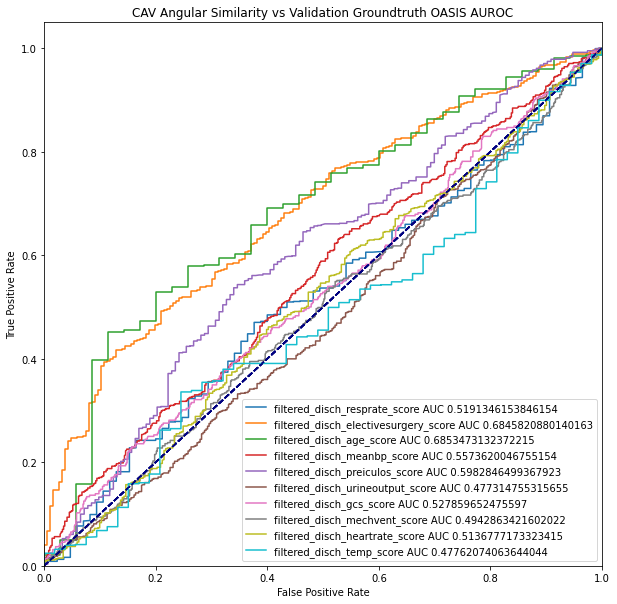

In [28]:
import pickle
import os
num_random=50

# rf = 'OASIS_discharge_meanbp_score'
# rf='filtered_meanbp_score'
activations_df = pd.DataFrame([activations]).transpose()
activations_df.columns=['activations']
rfs = [x for x in os.listdir('../concept_listfiles') if 'filtered' in x and 'encode' not in x and 'disch' in x and not 'negative' in x]
plt.figure(figsize=(10,10))

for rf in rfs:
    vecs = []
    cav_dir = 'cavs_distilbert_relative/'
    for fn in os.listdir(cav_dir):
        if rf in fn:
    #         print(fn)
            with open(cav_dir + fn ,'rb') as f:
                concept_vec=pickle.load(f)
            if concept_vec['concepts'][0]==rf and 'disch' in concept_vec['concepts'][1]:
                vecs.append(concept_vec['cavs'][0])
                print(concept_vec['concepts'][0],concept_vec['concepts'][1])
    #         elif concept_vec['concepts'][1]==rf:
    #             vecs.append(concept_vec['cavs'][1])
    #         else:
    #             assert False, concept_vec

    concept_vec = np.mean(np.array(vecs),axis=0)

    concept_vec.shape#.shape#['cavs'][0].shape

    def sim(cosdist):
        return 1-np.arccos(1-cosdist)/np.pi

    distance_df=pd.DataFrame(test_sentences, columns=['TEXT'])
    distance_df['distance'] = activations_df['activations'].apply(lambda x:spatial.distance.cosine(x, concept_vec))
    
    distance_df['angular_similarity']=distance_df['distance'].apply(sim)

    distance_df['text'] = decoded
    distance_df
    distance_df_merged = distance_df.merge(threshed, on=['TEXT'])
# distance_df_merged
    component=999
    for x in [x for x in merged.columns if '_score' in x]:
        if x in rf:
            component = x
    fpr,tpr,_= roc_curve(distance_df_merged[component], distance_df_merged['angular_similarity'])

    roc_auc = auc(fpr, tpr)
    print(roc_auc)

#     plt.figure()

    plt.plot(fpr, tpr,
              label=rf+' AUC ' + str(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CAV Angular Similarity vs Validation Groundtruth OASIS AUROC')
    plt.legend( loc="lower right")
plt.show()
#     distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']]['text'].iloc[0]
#     nlargest = distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']].iloc[:10].values
#     nsmallest =distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']].iloc[-10:].values

#     result = pd.DataFrame(list(nlargest)+ list(nsmallest), columns=['cos_dist','ang_sim','TEXT'])
#     result.to_csv('similar_examples/hilo10_sentences500random'+rf+'.csv')

In [ ]:
del notes_df

In [23]:
activations_df = pd.DataFrame([activations],index=['activations']).transpose()

In [24]:
activations_df

,activations
0,"[0.8716105, 0.47265926, -0.0003752336, 0.88186..."
1,"[0.4311696, 0.66626465, -0.52402467, 0.7011626..."
2,"[0.33590037, 0.68082863, -0.8770934, 0.6062981..."
3,"[0.881256, 0.49311712, 0.009733148, 0.86905515..."
4,"[0.06846154, 0.0154963145, -0.67956054, -0.629..."
...,...
1055,"[0.59973884, 0.51426864, -0.2694886, 0.7352381..."
1056,"[1.0341444, 0.5910855, 0.049506694, 0.80422, 0..."
1057,"[0.8743916, 0.47794905, -0.00862392, 0.8769971..."
1058,"[-0.5400236, 0.8292186, -0.91745955, -0.262186..."


In [28]:
# list(activations_df['activations'].iloc[0])

In [ ]:
activations_df['activations']=[list(x) for x in list(activations_df['activations']]

In [1]:
activations_df

NameError: name 'activations_df' is not defined

In [65]:
activations_df['TEXT']=val_df['TEXT']
activations_df = activations_df.merge(merged, on=['TEXT'])
#to_csv('similar_examples/val_set_activations_distilbert_layer5.csv')


,activations,TEXT,Unnamed: 0,label,HADM_ID,ICUSTAY_ID,subject_id,hadm_id,icustay_id,age_score,preiculos_score,gcs_score,heartrate_score,meanbp_score,resprate_score,temp_score,urineoutput_score,mechvent_score,electivesurgery_score
0,"[0.8716105, 0.47265926, -0.0003752336, 0.88186...",Admission Date: [**2163-10-14**] ...,1173410,0,192184.0,214873,18530,192184,214873,0,5,0.0,6.0,0.0,6.0,4.0,0.0,9,6
1,"[0.4311696, 0.66626465, -0.52402467, 0.7011626...",Admission Date: [**2113-6-4**] Discharge ...,11338,0,102825.0,247991,22032,102825,247991,6,1,0.0,0.0,4.0,1.0,2.0,1.0,9,6
2,"[0.33590037, 0.68082863, -0.8770934, 0.6062981...",Admission Date: [**2166-2-17**] Discharge...,598227,0,124218.0,290904,10660,124218,290904,3,5,4.0,3.0,0.0,6.0,2.0,1.0,9,6
3,"[0.881256, 0.49311712, 0.009733148, 0.86905515...",Admission Date: [**2198-6-4**] D...,1816266,0,197639.0,244580,26132,197639,244580,9,1,0.0,1.0,2.0,1.0,2.0,1.0,9,6
4,"[0.06846154, 0.0154963145, -0.67956054, -0.629...",Admission Date: [**2197-2-12**] ...,1167574,0,107516.0,264318,55115,107516,264318,6,5,3.0,1.0,2.0,1.0,2.0,5.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,"[1.0341444, 0.5910855, 0.049506694, 0.80422, 0...",Admission Date: [**2105-6-10**] ...,1537472,0,124649.0,268289,59890,124649,268289,6,1,0.0,1.0,2.0,1.0,4.0,0.0,0,6
1121,"[0.8743916, 0.47794905, -0.00862392, 0.8769971...",Admission Date: [**2127-12-24**] Discha...,1342643,0,190427.0,261884,15068,190427,261884,9,0,0.0,1.0,0.0,1.0,4.0,0.0,0,0
1122,"[-0.5400236, 0.8292186, -0.91745955, -0.262186...",Admission Date: [**2123-2-11**] ...,447522,0,180602.0,216056,50911,180602,216056,3,5,0.0,3.0,0.0,1.0,2.0,0.0,9,6
1123,"[-0.5400236, 0.8292186, -0.91745955, -0.262186...",Admission Date: [**2123-2-11**] ...,447522,0,180602.0,281541,50911,180602,281541,3,1,0.0,1.0,0.0,1.0,2.0,1.0,9,6


In [25]:
activations_df#.merge(merged, on=['TEXT'])

NameError: name 'activations_df' is not defined

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy import spatial

In [8]:
notes_df = pd.read_csv('../../../LHC_mimic/mimic3_1.4/raw_data/NOTEEVENTS.csv')

In [9]:
bertacts = pd.read_csv('similar_examples/val_set_activations_distilbert_layer5.csv')
bertacts=bertacts[[col for col in bertacts.columns if 'Unnamed' not in col ]]

In [40]:
notes_df['weekday']=pd.to_datetime(notes_df['CHARTDATE']).dt.day_name()

In [14]:
bertacts=bertacts.merge(notes_df[['TEXT','weekday']] ,on=['TEXT'])

In [41]:
threshed=threshed.merge(notes_df[['TEXT','weekday']] ,on=['TEXT'])

In [50]:
for day in threshed['weekday'].unique():
    threshed[day]=threshed['weekday'].apply(lambda x: 1 if x==day else 0)

In [19]:
import pickle
import os
# rf = 'OASIS_discharge_meanbp_score'
# rf='filtered_meanbp_score'
activations_df = pd.DataFrame(bertacts['activations'])

WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_0
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_5
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_6
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_3
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_9
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_4
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_1
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_8
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_2
WEEKDAY_discharge_Monday negative500_WEEKDAY_discharge_Monday_7
WEEKDAY_discharge_Monday
0.5356911611996824


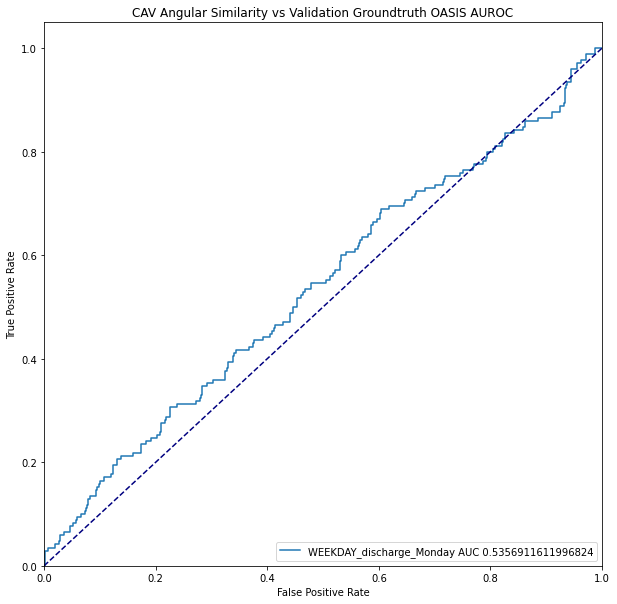

In [61]:
rfs = [x for x in os.listdir('../concept_listfiles') if 'disch' in x and 'encode' not in x and 'disch' in x and not 'negative' in x]
plt.figure(figsize=(10,10))
# threshed =bertacts.apply(lambda col: col if 'score' not in col.name  else  [1 if not pd.isnull(x) and x>=1  else 0 for x in col ])
for rf in rfs:
    cav_dir = 'cavs_distilbert_relative/'
    vecs=[]
    for fn in os.listdir(cav_dir):
        if rf in fn:
    #         print(fn)
            with open(cav_dir + fn ,'rb') as f:
                concept_vec=pickle.load(f)
            if concept_vec['concepts'][0]==rf and 'disch' in concept_vec['concepts'][1] and 'negative' in concept_vec['concepts'][1] :
                vecs.append(concept_vec['cavs'][0])
                print(concept_vec['concepts'][0],concept_vec['concepts'][1])
    #         elif concept_vec['concepts'][1]==rf:
    #             vecs.append(concept_vec['cavs'][1])
    #         else:
    #             assert False, concept_vec
    if len(vecs)==0:
        continue
    print(rf)
    concept_vec = np.mean(np.array(vecs),axis=0)

    concept_vec.shape#.shape#['cavs'][0].shape

    def sim(cosdist):
        return 1-np.arccos(1-cosdist)/np.pi

    distance_df=pd.DataFrame(val_df['TEXT'], columns=['TEXT'])
    
    distance_df['distance'] = activations_df['activations'].apply(lambda x:spatial.distance.cosine(x, concept_vec))
    
    distance_df['angular_similarity']=distance_df['distance'].apply(sim)

#     distance_df['TEXT'] = threshed['TEXT']
    distance_df
    distance_df_merged = distance_df.merge(threshed, on=['TEXT'])
# distance_df_merged
#     component=999
#     for x in [x for x in merged.columns if '_score' in x]:
#         if x in rf:
#             component = x
    component=rf.split('_')[-1]
    fpr,tpr,_= roc_curve(distance_df_merged[component], distance_df_merged['angular_similarity'])

    roc_auc = auc(fpr, tpr)
    print(roc_auc)

#     plt.figure()

    plt.plot(fpr, tpr,
              label=rf+' AUC ' + str(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CAV Angular Similarity vs Validation Groundtruth OASIS AUROC')
    plt.legend( loc="lower right")
plt.show()
#     distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']]['text'].iloc[0]
#     nlargest = distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']].iloc[:10].values
#     nsmallest =distance_df.sort_values(by='angular_similarity', ascending=False)[['distance','angular_similarity','text']].iloc[-10:].values

#     result = pd.DataFrame(list(nlargest)+ list(nsmallest), columns=['cos_dist','ang_sim','TEXT'])
#     result.to_csv('similar_examples/hilo10_sentences500random'+rf+'.csv')

In [62]:
distance_df

,TEXT,distance,angular_similarity
0,Admission Date: [**2163-10-14**] ...,0.992015,0.502542
1,Admission Date: [**2113-6-4**] Discharge ...,0.998901,0.500350
2,Admission Date: [**2166-2-17**] Discharge...,1.001028,0.499673
3,Admission Date: [**2198-6-4**] D...,0.996087,0.501246
4,Admission Date: [**2197-2-12**] ...,1.007797,0.497518
...,...,...,...
1055,Admission Date: [**2159-5-15**] Dischar...,1.005180,0.498351
1056,Admission Date: [**2105-6-10**] ...,0.994787,0.501659
1057,Admission Date: [**2127-12-24**] Discha...,0.995087,0.501564
1058,Admission Date: [**2123-2-11**] ...,1.010633,0.496615


In [60]:
activations_df

,activations
0,"[0.8716105, 0.47265926, -0.0003752336, 0.88186..."
1,"[0.4311696, 0.66626465, -0.52402467, 0.7011626..."
2,"[0.33590037, 0.68082863, -0.8770934, 0.6062981..."
3,"[0.881256, 0.49311712, 0.009733148, 0.86905515..."
4,"[0.06846154, 0.0154963145, -0.67956054, -0.629..."
...,...
1055,"[0.59973884, 0.51426864, -0.2694886, 0.7352381..."
1056,"[1.0341444, 0.5910855, 0.049506694, 0.80422, 0..."
1057,"[0.8743916, 0.47794905, -0.00862392, 0.8769971..."
1058,"[-0.5400236, 0.8292186, -0.91745955, -0.262186..."


In [35]:
# activations_df['activations'].iloc[0]

'[ 8.7161052e-01  4.7265926e-01 -3.7523359e-04 ...  2.8901404e-01\n  5.3126377e-01  6.1833614e-01]'

In [30]:
threshed

,Unnamed: 0,TEXT,label,HADM_ID,ICUSTAY_ID,subject_id,hadm_id,icustay_id,age_score,preiculos_score,gcs_score,heartrate_score,meanbp_score,resprate_score,temp_score,urineoutput_score,mechvent_score,electivesurgery_score
0,1173410,Admission Date: [**2163-10-14**] ...,0,192184.0,214873,18530,192184,214873,0,1,0,1,0,1,1,0,1,1
1,11338,Admission Date: [**2113-6-4**] Discharge ...,0,102825.0,247991,22032,102825,247991,1,1,0,0,1,1,1,1,1,1
2,598227,Admission Date: [**2166-2-17**] Discharge...,0,124218.0,290904,10660,124218,290904,1,1,1,1,0,1,1,1,1,1
3,1816266,Admission Date: [**2198-6-4**] D...,0,197639.0,244580,26132,197639,244580,1,1,0,1,1,1,1,1,1,1
4,1167574,Admission Date: [**2197-2-12**] ...,0,107516.0,264318,55115,107516,264318,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,1537472,Admission Date: [**2105-6-10**] ...,0,124649.0,268289,59890,124649,268289,1,1,0,1,1,1,1,0,0,1
1117,1342643,Admission Date: [**2127-12-24**] Discha...,0,190427.0,261884,15068,190427,261884,1,0,0,1,0,1,1,0,0,0
1118,447522,Admission Date: [**2123-2-11**] ...,0,180602.0,216056,50911,180602,216056,1,1,0,1,0,1,1,0,1,1
1119,447522,Admission Date: [**2123-2-11**] ...,0,180602.0,281541,50911,180602,281541,1,1,0,1,0,1,1,1,1,1
